In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

import os 

In [2]:
os.getcwd()

'/Users/yusufsmacbookpro'

In [3]:
df = pd.read_csv('/Users/yusufsmacbookpro/Desktop/Springboard/Capstone1/start_up_cleaned.csv')

In [4]:
df.head().T

,0,1,2,3,4
state_code,CA,CA,CA,CA,CA
latitude,42.3589,37.2389,32.901,37.3203,37.7793
longitude,-71.0568,-121.974,-117.193,-122.05,-122.419
zip_code,92101,95032,92121,95014,94105
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
labels,1,1,1,1,0
founded_at,2007-01-01,2000-01-01,2009-03-18,2002-01-01,2010-08-01
first_funding_at,2009-04-01,2005-02-14,2010-03-30,2005-02-17,2010-08-01
last_funding_at,2010-01-01,2009-12-28,2010-03-30,2007-04-25,2012-04-01


In [5]:
df.dtypes

state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
city                         object
name                         object
labels                        int64
founded_at                   object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise               

In [6]:
#we need to convert the colums below from object to datetime
df.founded_at=pd.to_datetime(df.founded_at)
df.first_funding_at=pd.to_datetime(df.first_funding_at)
df.last_funding_at=pd.to_datetime(df.last_funding_at)

df.head(3)

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,...,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,...,c:16283,1,0,0,1,1,1,4.75,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,...,c:65620,0,0,1,0,0,0,4.00,1,acquired


In [7]:
df.dtypes

state_code                          object
latitude                           float64
longitude                          float64
zip_code                            object
city                                object
name                                object
labels                               int64
founded_at                  datetime64[ns]
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
is_CA                                int64
is_NY                                int64
is_MA                                int64
is_TX                                int64
is_otherstate                        int64
category_co

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                922 non-null    object        
 1   latitude                  922 non-null    float64       
 2   longitude                 922 non-null    float64       
 3   zip_code                  922 non-null    object        
 4   city                      922 non-null    object        
 5   name                      922 non-null    object        
 6   labels                    922 non-null    int64         
 7   founded_at                922 non-null    datetime64[ns]
 8   first_funding_at          922 non-null    datetime64[ns]
 9   last_funding_at           922 non-null    datetime64[ns]
 10  age_first_funding_year    922 non-null    float64       
 11  age_last_funding_year     922 non-null    float64       
 12  age_first_milestone_ye

In [9]:
df.shape

(922, 44)

In [10]:
#we see missing values for age first milestone year and age last milestone year so we're going to fill with mean()
df["age_first_milestone_year"].fillna((df["age_first_milestone_year"].mean()), inplace=True)
df["age_last_milestone_year"].fillna((df["age_last_milestone_year"].mean()), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                922 non-null    object        
 1   latitude                  922 non-null    float64       
 2   longitude                 922 non-null    float64       
 3   zip_code                  922 non-null    object        
 4   city                      922 non-null    object        
 5   name                      922 non-null    object        
 6   labels                    922 non-null    int64         
 7   founded_at                922 non-null    datetime64[ns]
 8   first_funding_at          922 non-null    datetime64[ns]
 9   last_funding_at           922 non-null    datetime64[ns]
 10  age_first_funding_year    922 non-null    float64       
 11  age_last_funding_year     922 non-null    float64       
 12  age_first_milestone_ye

In [12]:
#since were trying to predict the outcome, were going to drop the actual and replace them with dummie results for now
df=pd.get_dummies(df, columns=["status"], drop_first=True)
df.head(10).T


,0,1,2,3,4,5,6,7,8,9
state_code,CA,CA,CA,CA,CA,CA,CA,CA,MA,CA
latitude,42.3589,37.2389,32.901,37.3203,37.7793,37.4069,37.3916,38.0571,42.7122,37.4272
longitude,-71.0568,-121.974,-117.193,-122.05,-122.419,-122.09,-122.07,-122.514,-73.2036,-122.146
zip_code,92101,95032,92121,95014,94105,94043,94041,94901,1267,94306
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco,Mountain View,Mountain View,San Rafael,Williamstown,Palo Alto
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital,Matisse Networks,RingCube Technologies,ClairMail,VoodooVox,Doostang
labels,1,1,1,1,0,0,1,1,1,1
founded_at,2007-01-01 00:00:00,2000-01-01 00:00:00,2009-03-18 00:00:00,2002-01-01 00:00:00,2010-08-01 00:00:00,2002-01-01 00:00:00,2005-01-01 00:00:00,2004-01-01 00:00:00,2002-01-01 00:00:00,2005-06-01 00:00:00
first_funding_at,2009-04-01 00:00:00,2005-02-14 00:00:00,2010-03-30 00:00:00,2005-02-17 00:00:00,2010-08-01 00:00:00,2006-07-18 00:00:00,2006-09-21 00:00:00,2005-08-24 00:00:00,2005-08-02 00:00:00,2007-02-01 00:00:00
last_funding_at,2010-01-01 00:00:00,2009-12-28 00:00:00,2010-03-30 00:00:00,2007-04-25 00:00:00,2012-04-01 00:00:00,2006-07-18 00:00:00,2010-03-18 00:00:00,2010-10-04 00:00:00,2013-02-08 00:00:00,2010-02-05 00:00:00


In [13]:
df.corr()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
latitude,1.000000,0.368378,0.046798,-0.047056,-0.041645,-0.063206,-0.047706,-0.038955,-0.000295,-0.072931,...,-0.039267,0.031513,0.028722,-0.032795,-0.011437,-0.057322,-0.018927,-0.018272,0.032826,-0.046798
longitude,0.368378,1.000000,-0.035456,-0.014692,-0.000003,-0.047193,-0.080175,-0.072480,0.023558,0.018018,...,-0.045336,0.026173,0.101536,-0.065469,-0.065986,-0.040778,-0.043169,-0.045490,-0.091525,0.035456
labels,0.046798,-0.035456,1.000000,-0.075201,0.073623,0.140427,0.230136,0.359993,0.205301,0.040150,...,-0.043631,-0.057749,-0.072407,0.183669,0.207495,0.164790,0.140257,0.186309,0.310394,-1.000000
age_first_funding_year,-0.047056,-0.014692,-0.075201,1.000000,0.762641,0.496246,0.394579,-0.187374,-0.154854,0.046388,...,0.116730,0.169281,-0.346488,-0.292661,-0.059797,0.034617,0.121155,0.114190,0.050964,0.075201
age_last_funding_year,-0.041645,-0.000003,0.073623,0.762641,1.000000,0.609426,0.560356,0.072958,0.386099,0.116365,...,0.091769,0.351189,-0.354438,-0.099990,0.258930,0.317721,0.312421,0.122956,0.200670,-0.073623
age_first_milestone_year,-0.063206,-0.047193,0.140427,0.496246,0.609426,1.000000,0.777488,0.228551,0.177760,0.063783,...,0.028532,0.099511,-0.261813,0.013745,0.176043,0.190657,0.234171,0.051439,0.136193,-0.140427
age_last_milestone_year,-0.047706,-0.080175,0.230136,0.394579,0.560356,0.777488,1.000000,0.324755,0.238797,0.093365,...,-0.001235,0.081647,-0.234217,0.103491,0.241654,0.254502,0.233672,0.077054,0.181439,-0.230136
relationships,-0.038955,-0.072480,0.359993,-0.187374,0.072958,0.228551,0.324755,1.000000,0.358175,0.093785,...,-0.075439,-0.030335,-0.060111,0.316501,0.284200,0.258705,0.207897,0.115409,0.221870,-0.359993
funding_rounds,-0.000295,0.023558,0.205301,-0.154854,0.386099,0.177760,0.238797,0.358175,1.000000,0.115832,...,-0.014706,0.333579,0.011387,0.259646,0.443541,0.439669,0.324338,0.043495,0.258946,-0.205301
funding_total_usd,-0.072931,0.018018,0.040150,0.046388,0.116365,0.063783,0.093365,0.093785,0.115832,1.000000,...,-0.012019,0.009999,-0.059631,-0.023783,0.020073,0.045394,0.045166,0.046269,0.048960,-0.040150


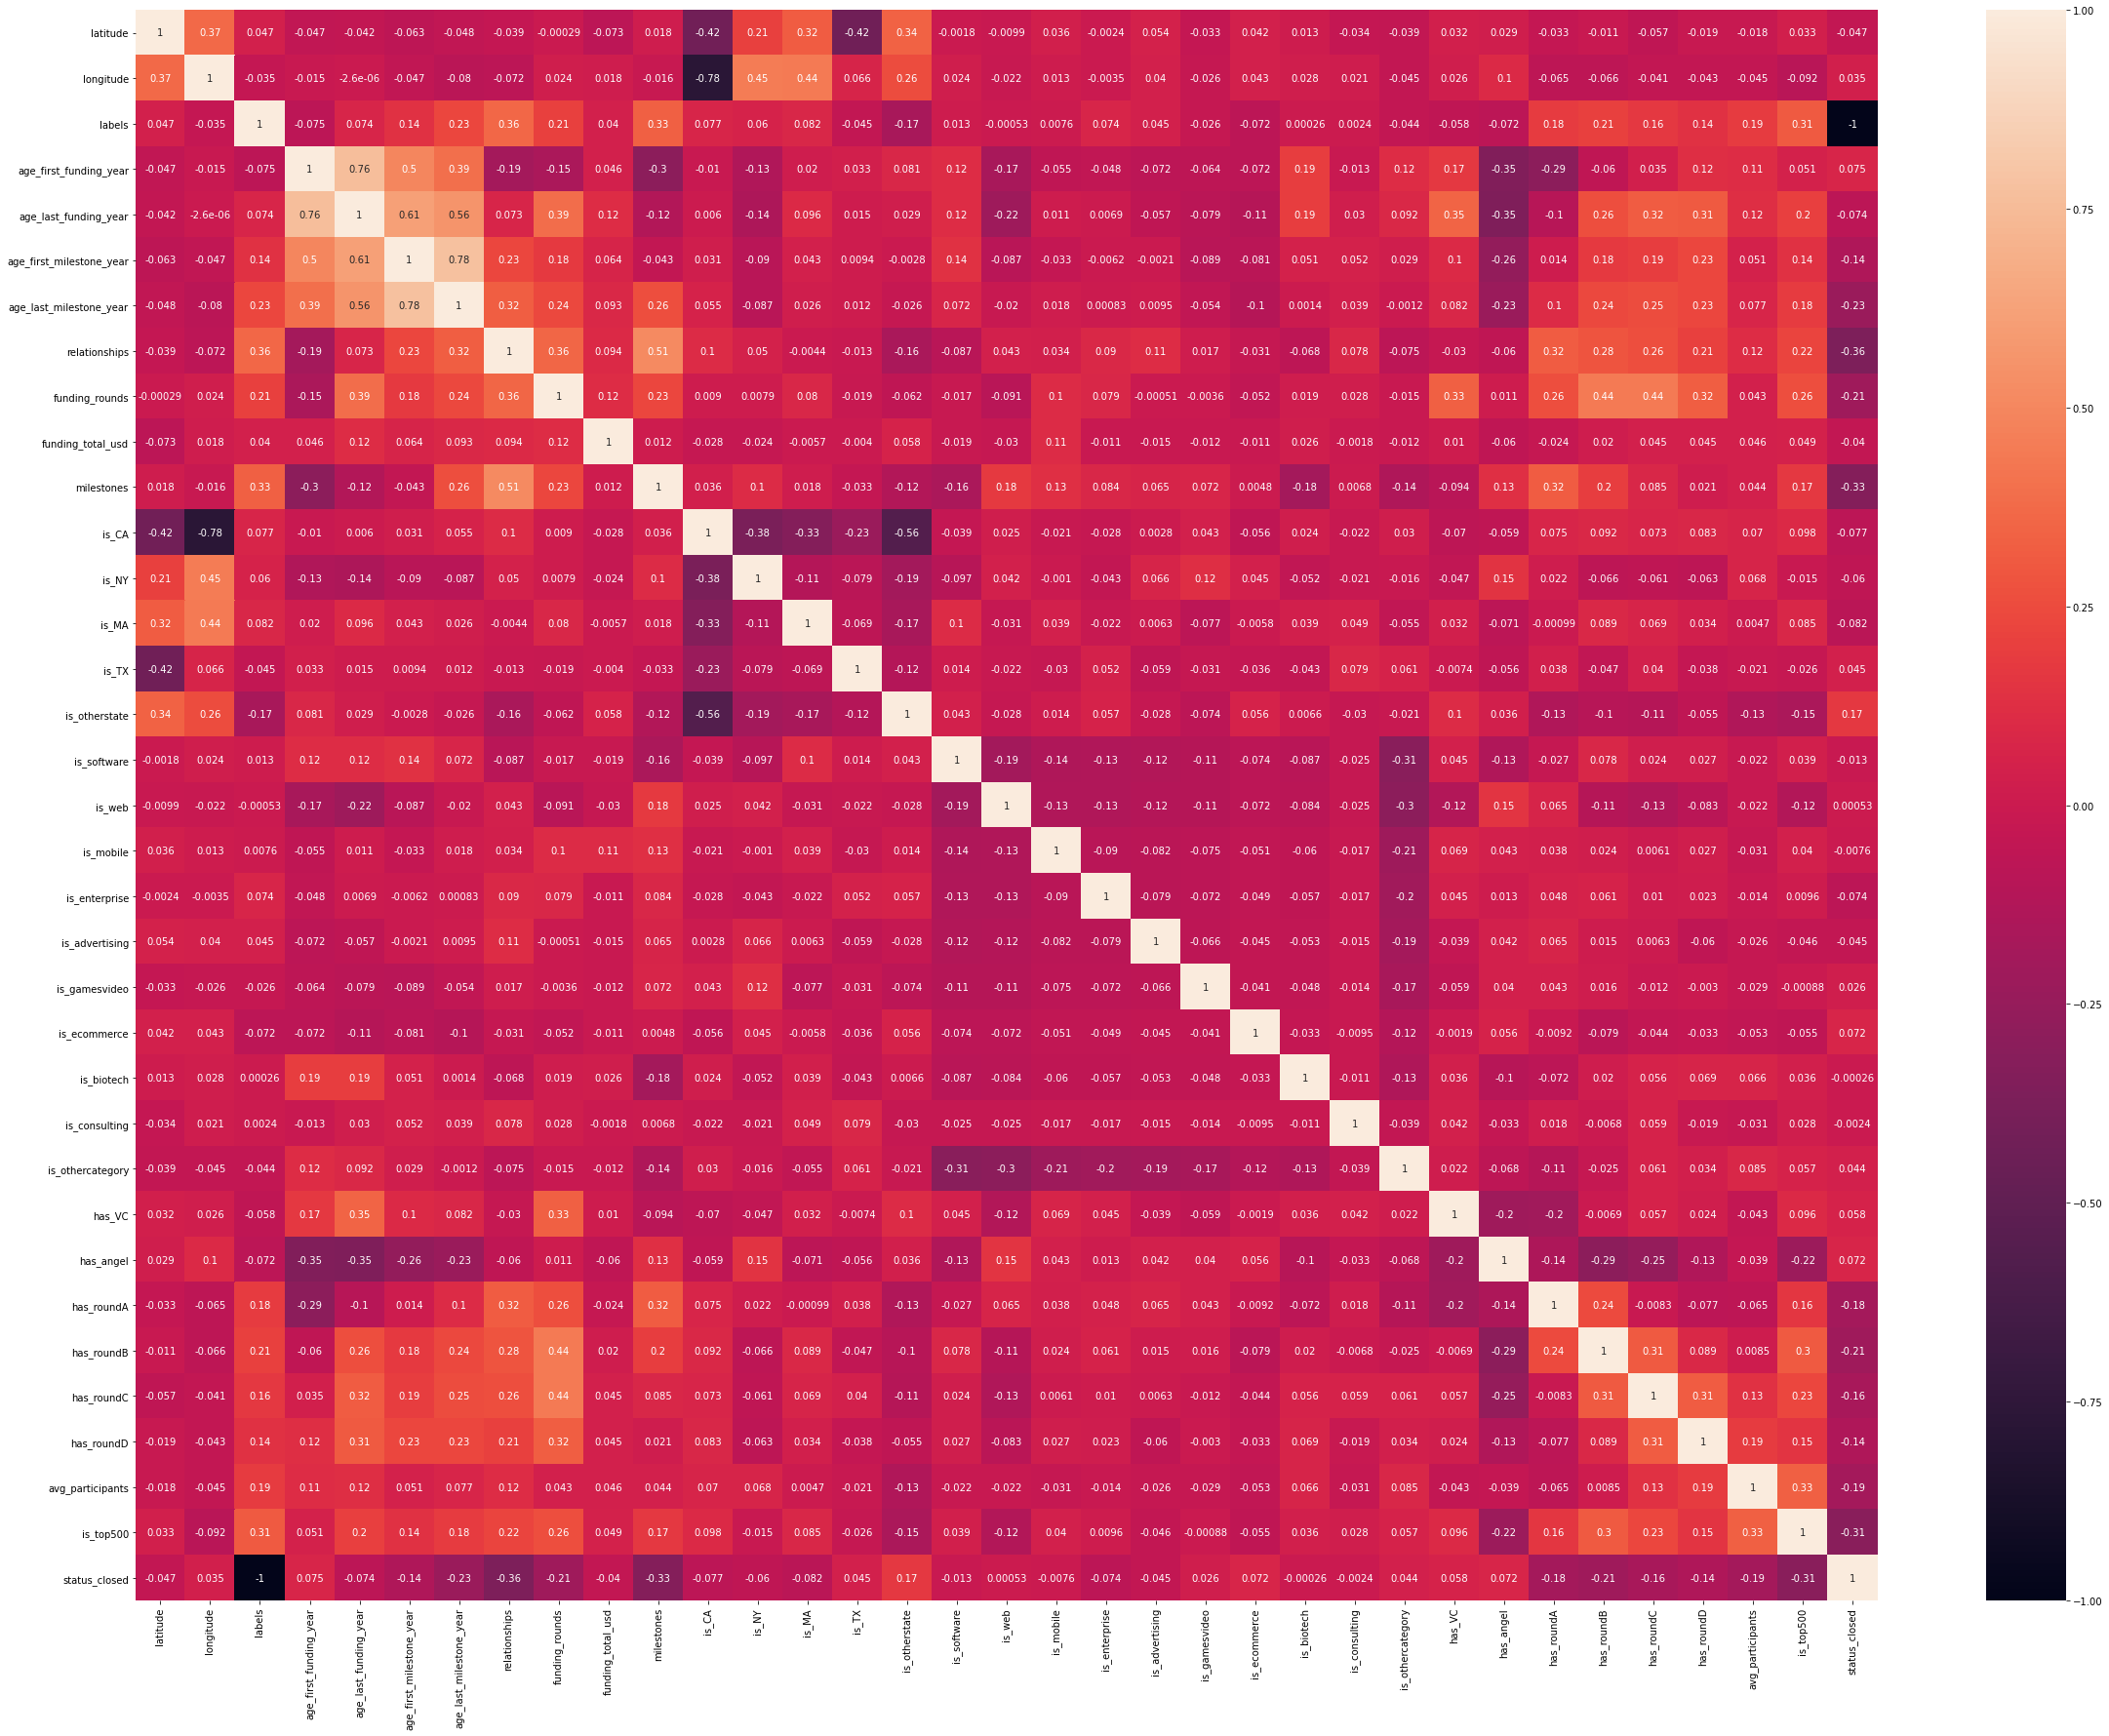

In [14]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

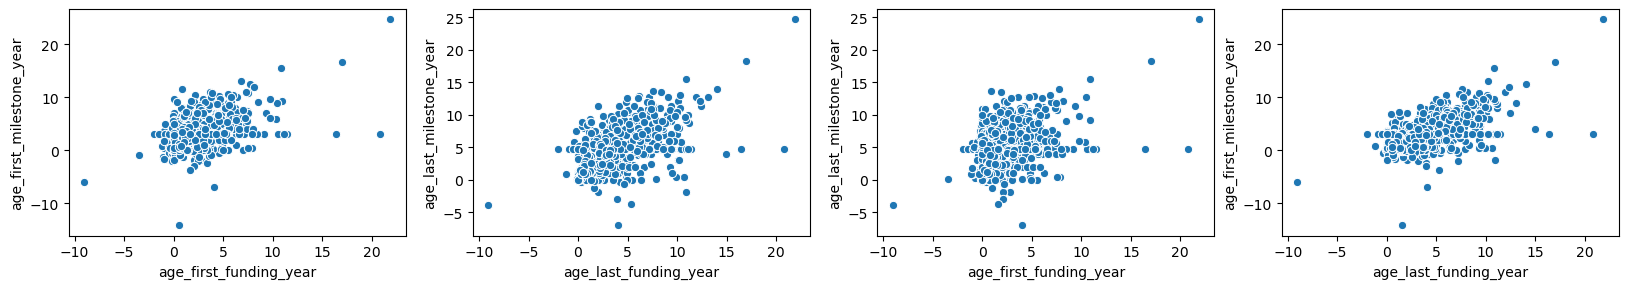

In [15]:
# From the heatmap we see some corellation between the time frame of companies progress, so lets explore
plt.figure(figsize=(20,3),dpi=100)

plt.subplot(1,4,1)
sns.scatterplot(df["age_first_funding_year"], df["age_first_milestone_year"])

plt.subplot(1,4,2)
sns.scatterplot(df["age_last_funding_year"], df["age_last_milestone_year"])

plt.subplot(1,4,3)
sns.scatterplot(df["age_first_funding_year"], df["age_last_milestone_year"])

plt.subplot(1,4,4)
sns.scatterplot(df["age_last_funding_year"], df["age_first_milestone_year"]);




In [16]:
#we see that all these have few negative values so we need to get the absolute value of those because we cant go back in time
#lets start by checking which have negative values.

age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for i in range(len(age)):
    print("negative value in '{}' column  : {} ".format(age[i],(df[age[i]]<0).any()))




negative value in 'age_first_funding_year' column  : True 
negative value in 'age_last_funding_year' column  : True 
negative value in 'age_first_milestone_year' column  : True 
negative value in 'age_last_milestone_year' column  : True 


In [17]:
#lets get the absolute values of the negatives

df["age_first_funding_year"]=np.abs(df["age_first_funding_year"])
df["age_last_funding_year"]=np.abs(df["age_last_funding_year"])
df["age_first_milestone_year"]=np.abs(df["age_first_milestone_year"])
df["age_last_milestone_year"]=np.abs(df["age_last_milestone_year"])

In [18]:
#Check if there are any negatives
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for i in range(len(age)):
    print("negative value in '{}' column  : {} ".format(age[i],(df[age[i]]<0).any()))


negative value in 'age_first_funding_year' column  : False 
negative value in 'age_last_funding_year' column  : False 
negative value in 'age_first_milestone_year' column  : False 
negative value in 'age_last_milestone_year' column  : False 


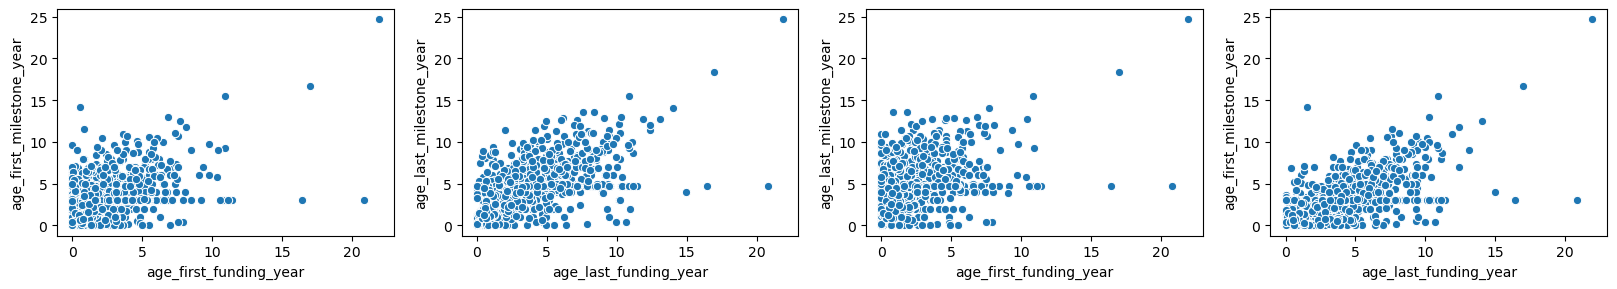

In [19]:
plt.figure(figsize=(20,3),dpi=100)

plt.subplot(1,4,1)
sns.scatterplot(df["age_first_funding_year"], df["age_first_milestone_year"])

plt.subplot(1,4,2)
sns.scatterplot(df["age_last_funding_year"], df["age_last_milestone_year"])

plt.subplot(1,4,3)
sns.scatterplot(df["age_first_funding_year"], df["age_last_milestone_year"])

plt.subplot(1,4,4)
sns.scatterplot(df["age_last_funding_year"], df["age_first_milestone_year"]);

#no more negative values

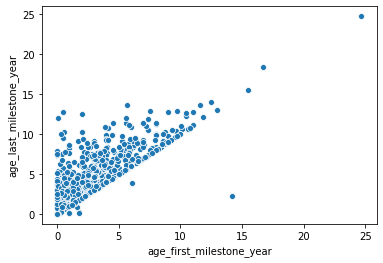

In [20]:
sns.scatterplot(df["age_first_milestone_year"], df["age_last_milestone_year"])
plt.show()

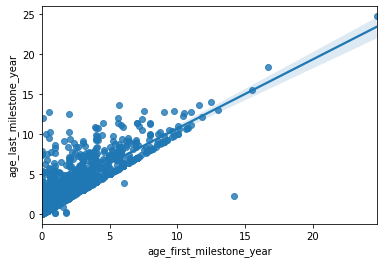

In [21]:
sns.regplot(df["age_first_milestone_year"], df["age_last_milestone_year"])
plt.show()

# we see some outliers here

In [22]:
df. describe()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status_closed
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,9.220000e+02,...,922.000000,922.000000,922.000000,922.000000,922.00000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,38.518566,-103.519249,0.646421,2.305953,3.962764,3.199722,4.808488,7.703905,2.309111,2.541017e+07,...,0.322126,0.325380,0.254881,0.507592,0.39154,0.232104,0.099783,2.839225,0.809111,0.353579
std,3.743372,22.398102,0.478340,2.448321,2.926818,2.551047,2.849058,7.266762,1.390562,1.897371e+08,...,0.467545,0.468771,0.436031,0.500214,0.48836,0.422404,0.299873,1.875518,0.393215,0.478340
min,25.752358,-122.756956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.199823,0.000000,0.589725,1.731475,1.348600,2.965725,3.000000,1.000000,2.712500e+06,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.365504,1.000000,1.475350,3.537000,3.055706,4.755399,5.000000,2.000000,1.000000e+07,...,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,2.500000,1.000000,0.000000
75%,40.730646,-77.213612,1.000000,3.584925,5.561600,4.002700,6.065050,10.000000,3.000000,2.465264e+07,...,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,16.000000,1.000000,1.000000


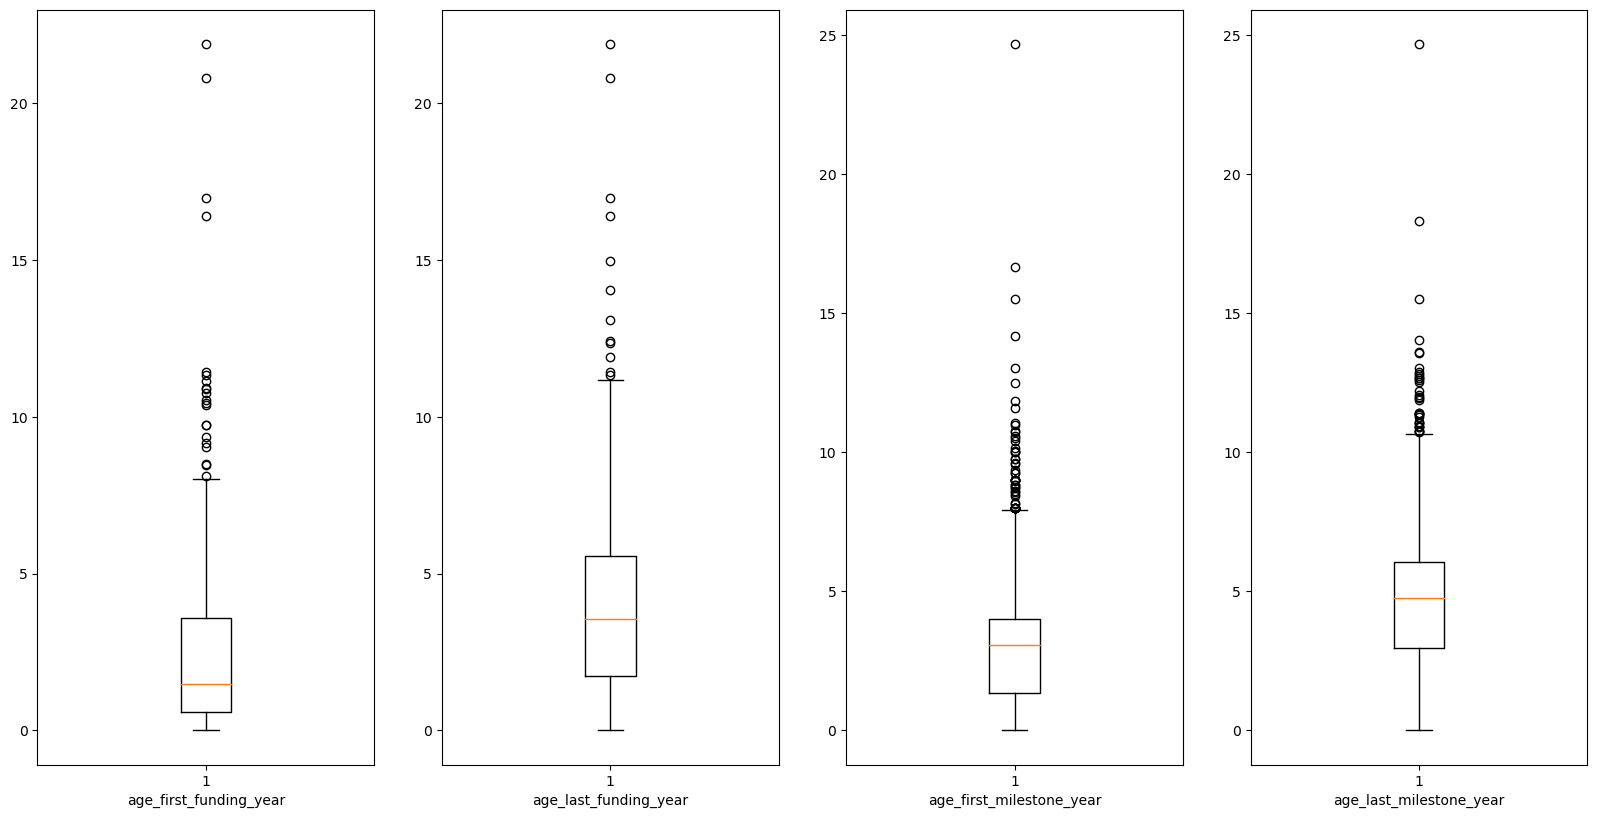

In [23]:
# Lets look at the outliers

plt.figure(figsize=(20,10),dpi=100)

plt.subplot(1,4,1)
plt.xlabel("age_first_funding_year")
plt.boxplot(df["age_first_funding_year"])

plt.subplot(1,4,2)
plt.xlabel("age_last_funding_year")
plt.boxplot(df["age_last_funding_year"])

plt.subplot(1,4,3)
plt.xlabel("age_first_milestone_year")
plt.boxplot( df["age_first_milestone_year"])

plt.subplot(1,4,4)
plt.xlabel("age_last_milestone_year")
plt.boxplot( df["age_last_milestone_year"]);

#we see alot of outliers, lets take the log of these 

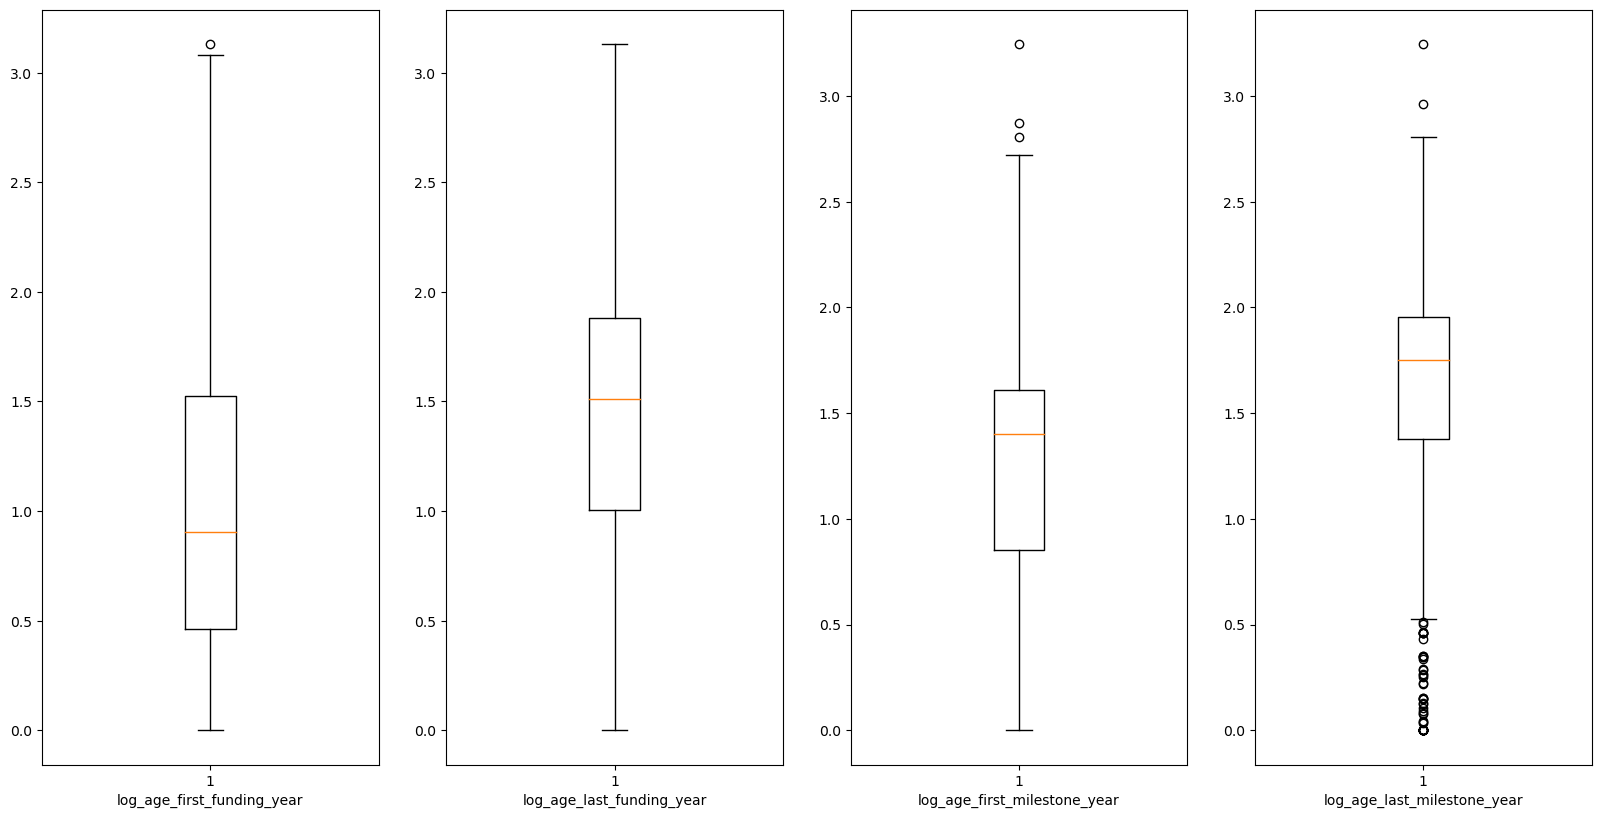

In [24]:
plt.figure(figsize=(20,10),dpi=100)

df["log_age_first_funding_year"]=np.log(df["age_first_funding_year"]+1)
plt.subplot(1,4,1)
plt.xlabel("log_age_first_funding_year")
plt.boxplot(df["log_age_first_funding_year"])  

df["log_age_last_funding_year"]=np.log(df["age_last_funding_year"]+1)
plt.subplot(1,4,2)
plt.xlabel("log_age_last_funding_year")
plt.boxplot(df["log_age_last_funding_year"]) 

df["log_age_first_milestone_year"]=np.log(df["age_first_milestone_year"]+1)
plt.subplot(1,4,3)
plt.xlabel("log_age_first_milestone_year")
plt.boxplot(df["log_age_first_milestone_year"]) 

df["log_age_last_milestone_year"]=np.log(df["age_last_milestone_year"]+1)
plt.subplot(1,4,4)
plt.xlabel("log_age_last_milestone_year")
plt.boxplot(df["log_age_last_milestone_year"]) ;

#much better

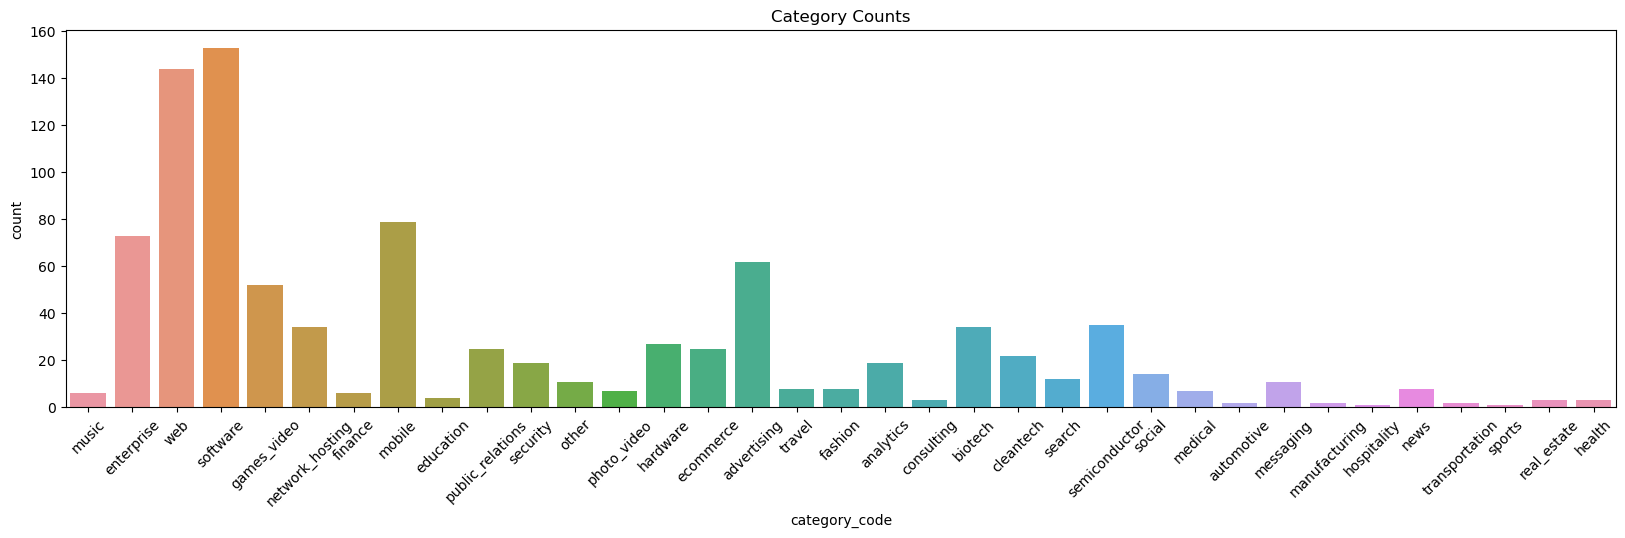

In [25]:
#lets start visiualizing the different colums

plt.figure(figsize=(20,5),dpi=100)
plt.xticks(rotation=45)
plt.title("Category Counts")
sns.countplot(df["category_code"]);

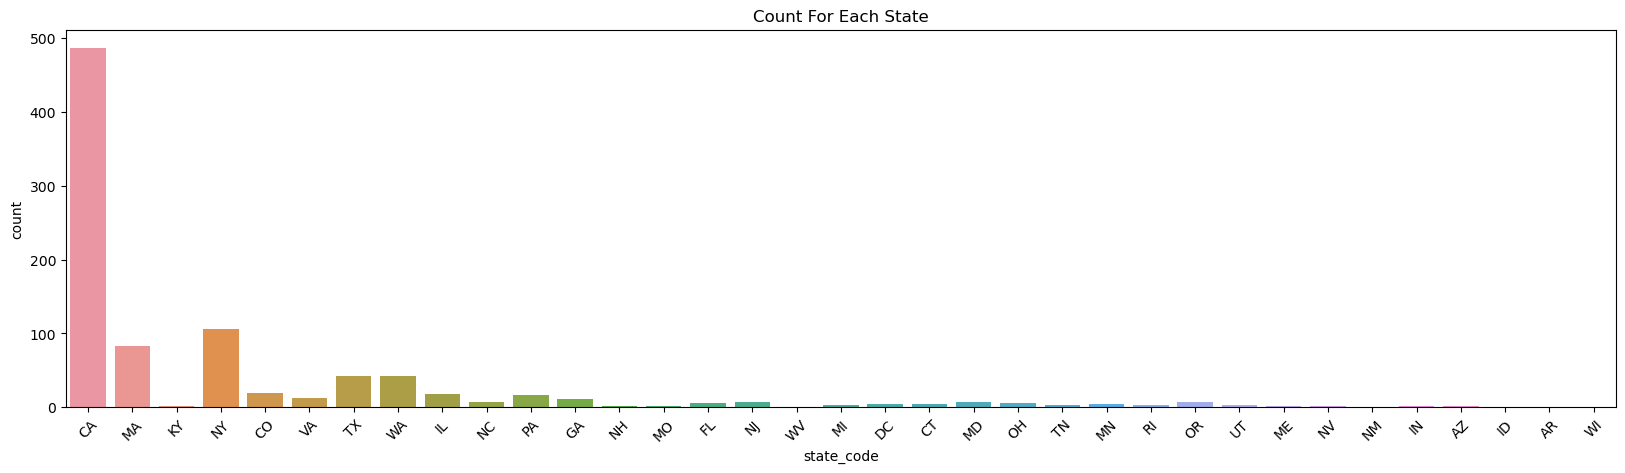

In [26]:
plt.figure(figsize=(20,5),dpi=100)
plt.xticks(rotation=45)
plt.title("Count For Each State")
sns.countplot(df["state_code"])

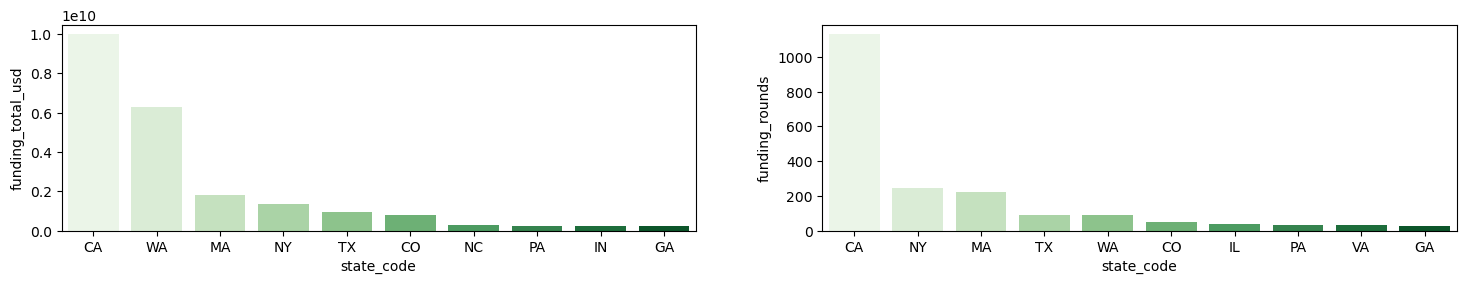

In [36]:
df_state=df.groupby(["state_code"])["funding_total_usd"].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
sns.barplot(df_state["state_code"],df_state["funding_total_usd"], palette="Greens")


plt.subplot(2,2,2)
df_funding=df.groupby(["state_code"])["funding_rounds"].sum().sort_values(ascending=False).reset_index().head(10)
sns.barplot(df_funding["state_code"], df_funding["funding_rounds"], palette="Greens");